In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\EXCELR\Assingments\Answers\Simple Linear Regression\delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [15]:
rg = LinearRegression()

In [16]:
rg.fit(X_train,y_train)

LinearRegression()

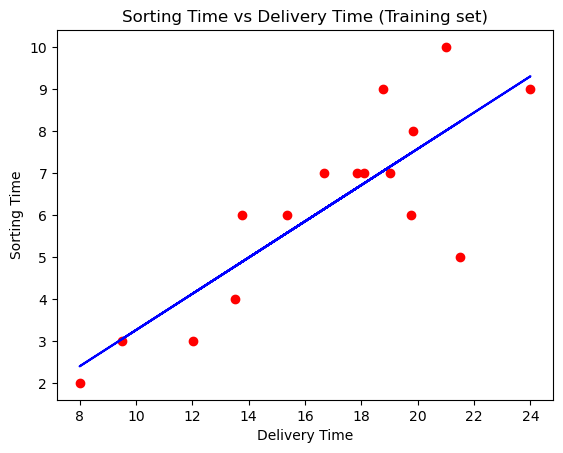

In [17]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, rg.predict(X_train), color = 'blue')
plt.title('Sorting Time vs Delivery Time (Training set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

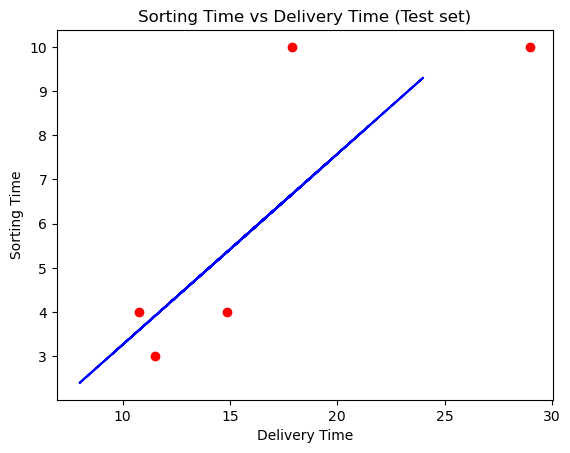

In [18]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, rg.predict(X_train), color = 'blue')
plt.title('Sorting Time vs Delivery Time (Test set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()